## __1. 환경설정__

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 만약 GPU를 사용하지 않으면 건너뛰기. 
# colab의 경우 GPU를 지원하므로 런타임 유형을 GPU로 변경하여 GPU를 사용할 것

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU만 사용하도록 제한
  # GPU 메모리 여유가 되는 한 메모리 추가 할당 
  # 메모리 할당문제(OOM)가 발생하는 경우 GPU 메모리 사용제한을 걸어둘것
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
    print(e)

1 Physical GPUs, 1 Logical GPUs


# __2. 이미지 살펴보기__

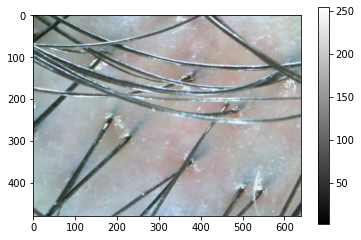

In [ ]:
# 원천 (raw) 데이터 하나 꺼내서 살펴보기
# 원천 데이터는 모두 ./input/raw 데이터에 몰아 넣을 것
root_dir = '/content/drive/Shareddrives/2021-2 융합전자연구-이해미팀/공통 공지 참고자료/AI Hub 미세각질 이미지 분류 예제'

normal_dir = root_dir + '/input/raw/[원천]미세각질_0.양호'
normal_img = os.listdir(root_dir + '/input/raw/[원천]미세각질_0.양호')[0]

sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()

In [ ]:
# 머리 이미지의 형태 확인
sample_img.shape

(480, 640, 3)

# __3. train, test, val 데이터셋 분할__

In [ ]:
# 원천(raw) 데이터셋에서 '[원천]미세각질' 이라는 폴더만 골라냄
# 원천 데이터는 압축을 미리 해제해 둘 것 

root_dir = '/content/drive/Shareddrives/2021-2 융합전자연구-이해미팀/공통 공지 참고자료/AI Hub 미세각질 이미지 분류 예제'
raw_dataset_dir = root_dir + '/input/raw'
raw_dataset = os.listdir(raw_dataset_dir)
# raw_dataset = filter(lambda x: '[원천]미세각질' in x and 'zip' not in x,  raw_dataset)
# raw_dataset = list(raw_dataset)

# 읽어들인 원천 데이터셋의 크기 확인
for raw_data in raw_dataset:
    file_nums = os.listdir(raw_dataset_dir + '/' + raw_data)
    print(f'{raw_data}, {len(file_nums): >10}')

[원천]미세각질_1.경증,       4435
[원천]미세각질_0.양호,        534
[원천]미세각질_2.중등도,       5486
[원천]미세각질_3.중증,       2284


In [ ]:
# import random
# import shutil

# # 1. train, test, val 데이터셋 분리
# # train, val, test 폴더가 있다면 지우고 다시 생성함. 

# # 1.1 train, val, test 폴더 삭제  
# root_dir = '/content/drive/Shareddrives/2021-2 융합전자연구-이해미팀/공통 공지 참고자료/AI Hub 미세각질 이미지 분류 예제'

# if 'train' in os.listdir(root_dir + '/input'):
#     shutil.rmtree(root_dir + '/input/train')
# if 'test' in os.listdir(root_dir + '/input'):
#     shutil.rmtree( root_dir + '/input/test')
# if 'val' in os.listdir(root_dir + '/input'):
#     shutil.rmtree(root_dir + '/input/val')

# # 1.2 train, val, test 폴더 생성
# os.mkdir( root_dir + '/input/train')
# os.mkdir( root_dir + '/input/test')
# os.mkdir( root_dir + '/input/val')

# # 1.3 train, val, test 셋 분리하기
# for raw_data in raw_dataset:
#     os.mkdir(f'{root_dir}/input/train/{raw_data}')
#     os.mkdir(f'{root_dir}/input/test/{raw_data}')
#     os.mkdir(f'{root_dir}/input/val/{raw_data}')

# # 1.4 원천 데이터셋에서 trian, val, test 데이터셋 분리 
# for raw_data in raw_dataset:
#     train = os.listdir(f'{root_dir}/input/raw/{raw_data}')
    
#     # test 데이터는 train 데이터의 20% 비율로 랜덤 샘플링
#     # val 데이터는 train 데이터의 10% 비율로 랜덤 샘플링
#     test = random.sample(train, int(len(train)*0.3))
#     val = random.sample(test, int(len(train)*0.1))

#     # train셋에서 test셋으로 선택된 것 제외 
#     # test셋에서 val셋으로 선택된 것 제외 
#     train = list(filter(lambda x: x not in test, train))
#     test = list(filter(lambda x: x not in val, test))
    
#     # 원천 데이터 --> train, val, test셋 폴더로 복사
#     for img in train:
#         src = f'{root_dir}/input/raw/{raw_data}/{img}'
#         dest = f'{root_dir}/input/train/{raw_data}/{img}'
#         shutil.copy(src, dest)
    
#     for img in test:
#         src = f'{root_dir}/input/raw/{raw_data}/{img}'
#         dest = f'{root_dir}/input/test/{raw_data}/{img}'
#         shutil.copy(src, dest)

#     for img in val:
#         src = f'{root_dir}/input/raw/{raw_data}/{img}'
#         dest = f'{root_dir}/input/val/{raw_data}/{img}'
#         shutil.copy(src, dest)

In [ ]:
# train, test, val 잘 나뉘었는지 확인
root_dir = '/content/drive/Shareddrives/2021-2 융합전자연구-이해미팀/공통 공지 참고자료/AI Hub 미세각질 이미지 분류 예제'
train = os.listdir(root_dir + '/input/train')
test = os.listdir(root_dir + '/input/test')
val = os.listdir(root_dir + '/input/val')

train_num = 0
for classes in train:
    train_num += len(os.listdir(f'{root_dir}/input/train/{classes}'))
print(f'num of train: {train_num}')

test_num = 0
for classes in test:
    test_num += len(os.listdir(f'{root_dir}/input/test/{classes}'))
print(f'num of test: {test_num}')

val_num = 0
for classes in val:
    val_num += len(os.listdir(f'{root_dir}/input/val/{classes}'))
print(f'num of val: {val_num}')

total = train_num + test_num + val_num
print(f'train: test: val = {train_num/total: 0.1f}: {test_num/total: 0.1f}: {val_num/total: 0.1f}')

num of train: 8919
num of test: 2548
num of val: 1272
train: test: val =  0.7:  0.2:  0.1


# __4. 데이터 전처리 & 적재__

In [ ]:
import tensorflow as tf

In [ ]:
# 대용량 데이터이므로 tensorflow Dataset 클래스 사용

root_dir = '/content/drive/Shareddrives/2021-2 융합전자연구-이해미팀/공통 공지 참고자료/AI Hub 미세각질 이미지 분류 예제'

train_dir = root_dir + '/input/train'
val_dir = root_dir + '/input/val'
test_dir = root_dir + '/input/test'

a = str(train_dir+'/*/*')
b = str(val_dir+'/*/*')
c = str(test_dir+'/*/*')

# 텐서플로우 데이터셋으로 불러오기
train_list_ds = tf.data.Dataset.list_files(a, shuffle=True)
val_list_ds = tf.data.Dataset.list_files(b, shuffle=True)
test_list_ds = tf.data.Dataset.list_files(c, shuffle=True)

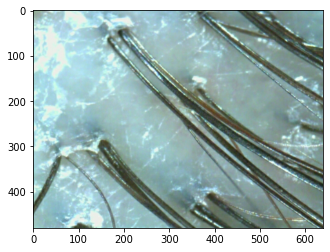

In [ ]:
# tensorflow Dataset으로 불러온 데이터 1개 꺼내서 확인해보기
for img_path in train_list_ds.take(1):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    plt.imshow(img)
    

In [ ]:
import numpy as np
from tensorflow import keras

# 클래스 이름은 trian 데이터가 들어가 있는 폴더의 이름으로 지정 
class_names = np.array(sorted(os.listdir(train_dir)))
num_classes = len(class_names)
batch_size = 16

# 파일의 경로를 전달받아 라벨을 생성하는 함수
# one-hot 인코딩 형태로 라벨을 반환함 
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep) 
    return parts[-2] == class_names 

# 읽어들인 데이터를 이미지 파일로 변환하는 함수. 
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)  # 데이터 버퍼 --> 이미지로 변환 
    resized_img = tf.image.resize(img,[224,224]) # 추후에 쓰일 xception 모델은 (224,224,3) 크기로 변환요구
    final_image = keras.applications.xception.preprocess_input(resized_img) # xception 라이브러리에서 제공하는 함수로 이미지 전처리 
    return final_image 

# 파일경로를 전달받아 읽어들인 뒤 라벨, 이미지를 반환하는 함수 
def process_path(file_path): 
    label = get_label(file_path) #라벨 생성

    # 데이터버퍼 --> 이미지
    img = tf.io.read_file(file_path) 
    img = decode_img(img) 
    
    return img, label 

In [ ]:
# 데이터 전처리
# train, test, val 셋의 batch, shuffle, repeat등의 설정을 한다
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)  
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    # ds = ds.preftech(1)
    return ds

In [ ]:
# tensorflow는 병렬처리 지원. 훈련 속도가 향상되는 효과가 있음 
autotune = tf.data.experimental.AUTOTUNE

# train, test, val 셋을 생성. 각각의 데이터셋은 (이미지, 라벨) 형태로 구성되어 있음
train_labeled_ds = train_list_ds.map(process_path, num_parallel_calls=autotune)
test_labeled_ds = test_list_ds.map(process_path, num_parallel_calls=autotune)
val_labeled_ds = val_list_ds.map(process_path, num_parallel_calls=autotune)

# train, test, val셋을 훈련하기 적절하도록 데이터셋 전처리
train_ds = prepare_for_training(train_labeled_ds).prefetch(1)
test_ds =  prepare_for_training(test_labeled_ds).prefetch(1)
val_ds = prepare_for_training(val_labeled_ds).prefetch(1)

# __5.모델 설정__

In [ ]:
from tensorflow import keras
from keras import layers, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import Xception

METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
]

def create_model(trainable=False):    
    # 기본 모델은 Xception 모델을 사용함. 용량이 적은 모델중 하나여서 사용. 다른 모델을 사용해도 무방
    # weights는 기존에 훈련된 가중치를 불러옴
    # include_top=True을 하는 경우 기존 모델에서 출력층을 제외하므로 customize 가능 
    base_model = Xception(weights='imagenet', include_top=False)

    # 기존 모델의 출력층을 변환 
    avg = layers.GlobalAveragePooling2D()(base_model.output)
    # 최종 출력층은 4개의 클래스를 분류하므로 4개의 node + softmax 함수를 사용함 
    output = layers.Dense(4, activation='softmax')(avg)

    # 생성한 모델의 초기 가중치 동결. 
    for layer in base_model.layers:
        layer.trainable = trainable

    # 모델 생성
    model = Model(inputs=base_model.input, outputs=output)

    # optimizer는 SGD, ADAM, RMPROP등 적절한 것 취사선택 할 것 
    # optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
    optimizer= keras.optimizers.Adam()

    # loss의 경우 다중클래스를 분류하고 라벨이 one-hot encoding 되어 있으므로 categorical_crossentropy 선택
    # metrics는 정확도를 기준으로 모델 갱신
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=METRICS)
    return model

In [ ]:
# 모델 훈련
# 초기 10 epochs 훈련은 Xception 모델의 초기 가중치를 동결하고 새롭게 추가한 layer만 훈련함 
# 대략 60% 정도의 accuracy를 보여준 뒤 갱신되지 않을 것.

import os
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) # 로그 안 뜨게하는 옵션

root_dir = '/content/drive/Shareddrives/2021-2 융합전자연구-이해미팀/공통 공지 참고자료/AI Hub 미세각질 이미지 분류 예제'

model = create_model(trainable=False) # 빈 모델 생성
if 'checkpoint' in os.listdir(root_dir):   # 새롭게 추가한 layer를 훈련했다면 건너뛰기
    print('New layers are already trained. continue...') 
else:                                 # 훈련을 한번도 안했다면 초기 가중치를 동결하고 새롭게 추가한 layer 훈련 시작 
    print('New layers are not trained. training starts...')
    history = model.fit(
        train_ds,
        epochs=10,
        validation_data=val_ds, 
        steps_per_epoch=int(0.75 * len(train_labeled_ds) / batch_size),
        validation_steps=int(0.15 * len(val_labeled_ds) / batch_size),
    )
    # 새롭게 추가한 layer의 훈련된 가중치 저장 
    if 'checkpoint' not in os.listdir(root_dir): 
        os.mkdir(root_dir + '/checkpoint')  
    if 'initial' not in os.listdir(root_dir + '/checkpoint'):
        os.mkdir( root_dir + '/checkpoint/initial')
    model.save_weights( root_dir + '/checkpoint/initial')

New layers are already trained. continue...


In [ ]:
# Xception 모델의 가중치 동결 해제. 전체 훈련망 훈련 시작

# 이전에 훈련한 checkpoint가 있다면 불러오기
model = create_model(trainable=True)
if 'train' not in os.listdir(root_dir + '/checkpoint'):
    model.load_weights(root_dir + '/checkpoint/initial')
    print('Loading pretrained model...')
else:
    print('Continue to training...')
    model.load_weights(root_dir + '/checkpoint/train')

Continue to training...


In [ ]:
# checkpoint: epoch마다 신경망의 weights를 저장하기 위한 콜백 함수 
# reduce_lr: 신경망의 훈련이 진전이 없을 경우(가중치 소실문제 등) learning rate를 높게 수정함. 매 epoch마다 실행됨
# tensorboard_callback: 추후 텐서보드를 사용하면 그래픽 시각화 툴을 이용할 수 있음. 매 epoch마다 실행됨 

root_dir = '/content/drive/Shareddrives/2021-2 융합전자연구-이해미팀/공통 공지 참고자료/AI Hub 미세각질 이미지 분류 예제'
check_point_path = root_dir + '/checkpoint/train'
check_point = tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path, monitor='val_loss', mod='min', save_best_only=True, save_weights_only=True)
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, vervose=1)
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='.', histogram_freq=1, write_graph=True)

# 시간이 된다면 100 epoch 정도 진행하는 것을 권장. 
epochs=20
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds, 
    steps_per_epoch=int(0.2 * len(train_labeled_ds) / batch_size), # Epoch의 길이가 너무 길다면 step 크기 조절
    validation_steps=int(0.15 * len(val_labeled_ds) / batch_size), # Epoch의 길이가 너무 길다면 step 크기 조절
    callbacks=[check_point]
)

Epoch 1/20
111/111 [==============================] - 89s 739ms/step - loss: 0.1998 - accuracy: 0.9657 - precision: 0.9323 - recall: 0.9302 - val_loss: 0.7760 - val_accuracy: 0.8594 - val_precision: 0.7225 - val_recall: 0.7102
Epoch 2/20
111/111 [==============================] - 79s 711ms/step - loss: 0.2124 - accuracy: 0.9602 - precision: 0.9215 - recall: 0.9189 - val_loss: 1.4352 - val_accuracy: 0.8040 - val_precision: 0.6080 - val_recall: 0.6080
Epoch 3/20
111/111 [==============================] - 79s 710ms/step - loss: 0.3022 - accuracy: 0.9405 - precision: 0.8816 - recall: 0.8801 - val_loss: 2.6664 - val_accuracy: 0.7770 - val_precision: 0.5543 - val_recall: 0.5511
Epoch 4/20
111/111 [==============================] - 79s 710ms/step - loss: 0.3469 - accuracy: 0.9326 - precision: 0.8678 - recall: 0.8615 - val_loss: 1.5399 - val_accuracy: 0.7500 - val_precision: 0.5000 - val_recall: 0.4943
Epoch 5/20
111/111 [==============================] - 79s 710ms/step - loss: 0.3046 - accura

Text(0.5, 1.0, 'val_loss')

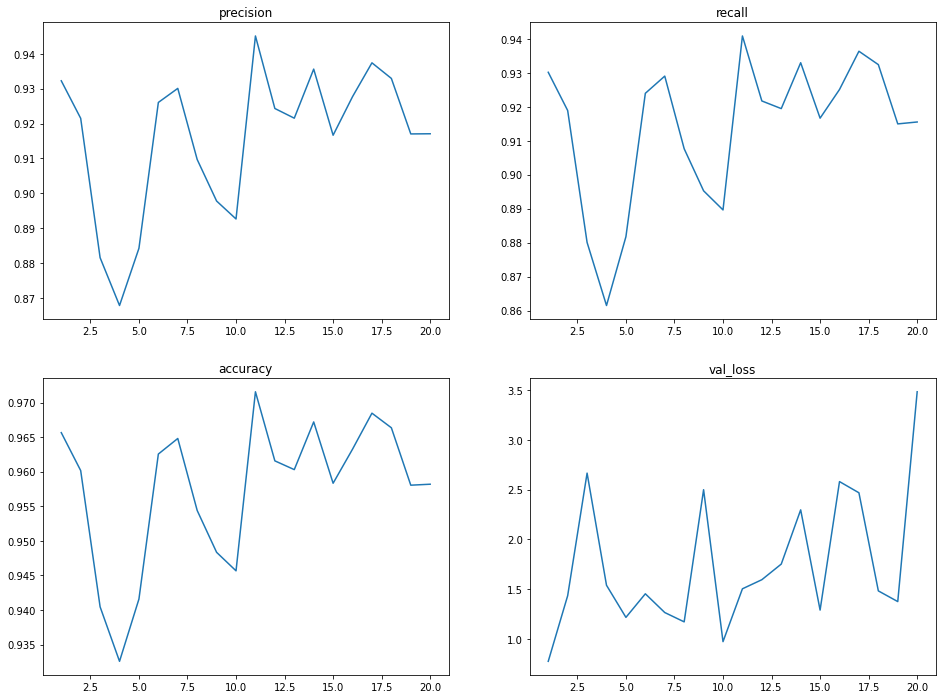

In [ ]:
# 모델 훈련 성능 평가  
import matplotlib.pyplot as plt

metrics = ['precision', 'recall', 'accuracy']
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.plot(list(range(1, epochs+1)), history.history['precision'])
plt.title('precision')

plt.subplot(2,2,2)
plt.plot(list(range(1, epochs+1)), history.history['recall'])
plt.title('recall')

plt.subplot(2,2,3)
plt.plot(list(range(1, epochs+1)), history.history['accuracy'])
plt.title('accuracy')

plt.subplot(2,2,4)
plt.plot(list(range(1, epochs+1)), history.history['val_loss'])
plt.title('val_loss')

In [ ]:
# 모델 성능 평가 2
steps = 100

# 가장 최고의 성능을 보였던 가중치 불러오기
model.load_weights(root_dir + '/checkpoint/train')
evaluation = model.evaluate(train_ds, steps=steps)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(val_ds, steps=steps)
print(f"Validation Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(test_ds, steps=steps)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


100/100 [==============================] - 17s 172ms/step - loss: 0.1035 - accuracy: 0.9881 - precision: 0.9768 - recall: 0.9756
Train Accuracy: 98.81%
100/100 [==============================] - 17s 171ms/step - loss: 0.8467 - accuracy: 0.8578 - precision: 0.7181 - recall: 0.7100
Validation Accuracy: 85.78%
100/100 [==============================] - 16s 165ms/step - loss: 0.8542 - accuracy: 0.8461 - precision: 0.6945 - recall: 0.6862
Test Accuracy: 84.61%
